In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#load the data
df = pd.read_csv(r"D:\AI\data\Bank_churn_modelling.csv")
df.shape

(10000, 14)

## 2. Data Exploration

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [6]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [7]:
df.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


## 3. Data Cleaning

In [8]:
# check for missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
# check for duplicates
df.duplicated().sum()

0

In [10]:
# drop unwanted rows
df.drop(['RowNumber',"CustomerId",'Surname'],axis=1,inplace=True)

In [11]:
# check for outliers
df.skew()

CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

## 4. Feature Engineering
#### Feature Selection

###### Correlation Analysis

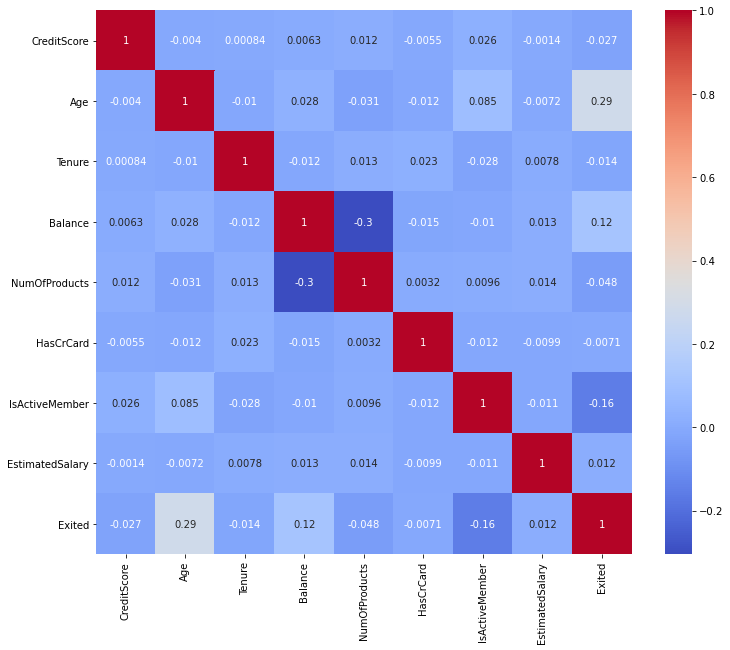

In [12]:
cor = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(cor,annot=True,cmap='coolwarm')
plt.show()

##### ANOVA - analysis of variance - F Test
    - it is used to compare the distributin of a variable in two or more groups
    - for example - comparing distribution of age of customers for groups exited = 1 & exited = 0
    
- Ho = Null Hypothesis = distribution of variable in two/more groups is uniform
- Ha = Alternate Hypothesis = distribution of the variable in two/more groups in not uniform

We always analyse the pvalue, consider for 95% confidence interval, signifcance = 5% = 0.05

    - if pvalue >0.05 = accept the Null hypothesis - feature is not important
    - if pvalue <0.05 = reject the Null hypothesis - feature is important

In [13]:
numerics = ['CreditScore','Age', 'Tenure', 'Balance','NumOfProducts','EstimatedSalary']
xnum = df[numerics]
y = df['Exited']
from sklearn.feature_selection import f_classif
fval,pval = f_classif(xnum,y)
for i in range(len(numerics)):print(numerics[i],pval[i])

CreditScore 0.006738213892258643
Age 1.2399313093415039e-186
Tenure 0.1615268494952801
Balance 1.275563319153163e-32
NumOfProducts 1.7173330048040421e-06
EstimatedSalary 0.22644042802376574


###### Chi Sqaure Test
    - Used to compare the distribution of categories of a categorical feature in two or more groups
    - in nutshell to compare whether a categorical attribute has some relationship with the other categorical attribute
    
- H0 = Null Hypothesis = the categorical attribute has uniform distribution in two or more groups
- Ha = Alternate hypothesis = the categorical attribute has different distribution in two or more groups

We always analyse the pvalue, consider 95% as confidence interval, significance level = 5% i.e.0.05

    - if pvalue >0.05 = accept the Null hypothesis - feature is not important
    - if pvalue <0.05 = reject the Null hypothesis - feature is important

In [14]:
categories = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']
xcat = df[categories]
y = df['Exited']
from sklearn.preprocessing import LabelEncoder
xcat['Geography'] = LabelEncoder().fit_transform(xcat['Geography'])
xcat['Gender'] = LabelEncoder().fit_transform(xcat['Gender'])
from sklearn.feature_selection import chi2
chival,pval = chi2(xcat,y)
for i in range(len(categories)):print(categories[i],pval[i])

Geography 0.0005756078382573235
Gender 7.015574513879596e-13
HasCrCard 0.6984962089530451
IsActiveMember 1.568036240543455e-27


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [16]:
# selecting important features
x = df[['CreditScore', 'Geography', 'Gender', 'Age', 'Balance',
       'NumOfProducts', 'IsActiveMember']]
y = df['Exited']
print(x.shape)
print(y.shape)

(10000, 7)
(10000,)


## 5. Preprocessing

In [17]:
x.head(10)

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,IsActiveMember
0,619,France,Female,42,0.00,1,1
1,608,Spain,Female,41,83807.86,1,1
2,502,France,Female,42,159660.80,3,0
3,699,France,Female,39,0.00,2,0
4,850,Spain,Female,43,125510.82,1,1
5,645,Spain,Male,44,113755.78,2,0
6,822,France,Male,50,0.00,2,1
7,376,Germany,Female,29,115046.74,4,0
8,501,France,Male,44,142051.07,2,1
9,684,France,Male,27,134603.88,1,1


In [18]:
# onehot encoding for features
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler

preprocessor = ColumnTransformer([("ohe",OneHotEncoder(drop='first'),[1,2]),
                                  ("sc",StandardScaler(),[0,3,4,5])],remainder='passthrough')

In [19]:
x_new = preprocessor.fit_transform(x)
pd.DataFrame(x_new).head(10)

,0,1,2,3,4,5,6,7
0,0.0,0.0,0.0,-0.326221,0.293517,-1.225848,-0.911583,1.0
1,0.0,1.0,0.0,-0.440036,0.198164,0.117350,-0.911583,1.0
2,0.0,0.0,0.0,-1.536794,0.293517,1.333053,2.527057,0.0
3,0.0,0.0,0.0,0.501521,0.007457,-1.225848,0.807737,0.0
4,0.0,1.0,0.0,2.063884,0.388871,0.785728,-0.911583,1.0
5,0.0,1.0,1.0,-0.057205,0.484225,0.597329,0.807737,0.0
6,0.0,0.0,1.0,1.774174,1.056346,-1.225848,0.807737,1.0
7,1.0,0.0,0.0,-2.840488,-0.946079,0.618019,4.246377,0.0
8,0.0,0.0,1.0,-1.547141,0.484225,1.050820,0.807737,1.0
9,0.0,0.0,1.0,0.346319,-1.136786,0.931463,-0.911583,1.0


In [20]:
# train test split
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x_new,y,test_size=0.25,random_state=5)
print(x_new.shape)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(10000, 8)
(7500, 8)
(2500, 8)
(7500,)
(2500,)


## 6. Apply machine Learning algorithm - logistic regression

In [21]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
# train the model using train data
model.fit(xtrain,ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

## 7. performance analysis

In [22]:
x.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Balance', 'NumOfProducts',
       'IsActiveMember'],
      dtype='object')

In [23]:
new_customer = [[650,"Germany","Male",45,456782,3,1]]
new_customer = preprocessor.transform(new_customer)
model.predict(new_customer)

array([0], dtype=int64)

In [24]:
model.predict_proba(new_customer)

array([[0.68838805, 0.31161195]])

In [25]:
# check the accuracy of the model using test data
ypred = model.predict(xtest)
from sklearn.metrics import accuracy_score
accuracy_score(ytest,ypred)

0.814

In [26]:
#check for recall
from sklearn import metrics
metrics.recall_score(ytest,ypred)

0.2055888223552894

In [27]:
metrics.confusion_matrix(ytest,ypred)

array([[1932,   67],
       [ 398,  103]], dtype=int64)

In [28]:
metrics.precision_score(ytest,ypred)

0.6058823529411764

In [29]:
metrics.f1_score(ytest,ypred)

0.30700447093889716

## Decision Tree

In [30]:
# onehot encoding for features
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler

preprocessor = ColumnTransformer([("ohe",OneHotEncoder(drop='first'),[1,2])],remainder='passthrough')

In [31]:
x_new = preprocessor.fit_transform(x)
# train test split
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x_new,y,test_size=0.25,random_state=5)
print(x_new.shape)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(10000, 8)
(7500, 8)
(2500, 8)
(7500,)
(2500,)


In [32]:
from sklearn import tree
model2 = tree.DecisionTreeClassifier(criterion='gini',random_state=5)
model2.fit(xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=5, splitter='best')

In [33]:
# performance on the test data
ypred2 = model2.predict(xtest)
print("Accuracy: ",metrics.accuracy_score(ytest,ypred2))
print("Recall: ",metrics.recall_score(ytest,ypred2))
print("F1 Score: ",metrics.f1_score(ytest,ypred2))

Accuracy:  0.8004
Recall:  0.47704590818363274
F1 Score:  0.48925281473899696


In [34]:
# performance on the train data
ypred2 = model2.predict(xtrain)
print("Accuracy: ",metrics.accuracy_score(ytrain,ypred2))
print("Recall: ",metrics.recall_score(ytrain,ypred2))
print("F1 Score: ",metrics.f1_score(ytrain,ypred2))

Accuracy:  0.9998666666666667
Recall:  0.9993489583333334
F1 Score:  0.9996743731683491


# Overfitting

 - ML model performs very well on the train data, but it fails to perform that well on test data

# Underfitting
 - ML model performs poor on train data and as well it performs poor on test data

In [35]:
model3 = tree.DecisionTreeClassifier(criterion='gini',random_state=5,
                                    max_depth=8,min_samples_leaf=5,min_samples_split=20)
model3.fit(xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=5, splitter='best')

In [36]:
# performance on the test data
ypred2 = model3.predict(xtest)
print("Accuracy: ",metrics.accuracy_score(ytest,ypred2))
print("Recall: ",metrics.recall_score(ytest,ypred2))
print("F1 Score: ",metrics.f1_score(ytest,ypred2))

Accuracy:  0.8488
Recall:  0.45109780439121755
F1 Score:  0.5445783132530121


In [37]:
# performance on the train data
ypred2 = model3.predict(xtrain)
print("Accuracy: ",metrics.accuracy_score(ytrain,ypred2))
print("Recall: ",metrics.recall_score(ytrain,ypred2))
print("F1 Score: ",metrics.f1_score(ytrain,ypred2))

Accuracy:  0.8786666666666667
Recall:  0.5403645833333334
F1 Score:  0.6459143968871597


## Hyperparameter Tuning using Gridsearch

In [38]:
from sklearn.model_selection import GridSearchCV

param_scope = {'max_depth':np.arange(3,20,2),
              "min_samples_leaf":np.arange(2,30,3),
              "min_samples_split":np.arange(5,80,5)}
param_scope

{'max_depth': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19]),
 'min_samples_leaf': array([ 2,  5,  8, 11, 14, 17, 20, 23, 26, 29]),
 'min_samples_split': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75])}

In [39]:
grid_search = GridSearchCV(tree.DecisionTreeClassifier(random_state=5),
                          param_grid=param_scope,scoring="recall",
                          n_jobs=-1,cv=5,verbose=True)
grid_search.fit(x_new,y)

Fitting 5 folds for each of 1350 candidates, totalling 6750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 810 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 2810 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done 5610 tasks      | elapsed:   34.1s
[Parallel(n_jobs=-1)]: Done 6750 out of 6750 | elapsed:   41.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=5,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19]),
                         'min_samples_leaf': array([ 2,  5

In [40]:
grid_search.best_score_

0.5110447066050007

In [41]:
grid_search.best_params_

{'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 30}

In [42]:
model4 = tree.DecisionTreeClassifier(random_state=5,max_depth=8,
                                    min_samples_leaf=10,min_samples_split=30)
model4.fit(xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=30,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=5, splitter='best')

In [43]:
x.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Balance', 'NumOfProducts',
       'IsActiveMember'],
      dtype='object')

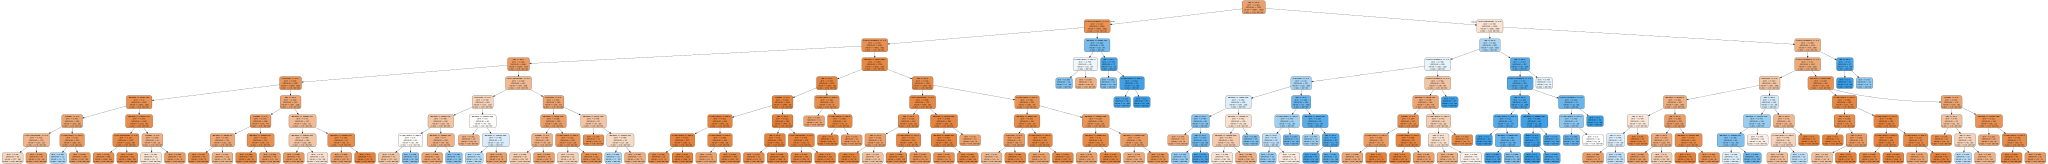

In [44]:
# conda install graphviz
import graphviz
feature_names = ['Germany','Spain','Gender','CreditScore','Age', 'Balance', 'NumOfProducts',
       'IsActiveMember']
class_names = ['Not Exited','Exited']
graph_data = tree.export_graphviz(model4,feature_names=feature_names,class_names=class_names,
                                 filled=True,rounded=True)
graph = graphviz.Source(graph_data)
graph

# Random Forest implementation

In [48]:
from sklearn.ensemble import RandomForestClassifier
model5 = RandomForestClassifier(n_estimators=100,oob_score=True,max_depth=15,
                               min_samples_leaf=5)

In [50]:
model5.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=15, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [53]:
model5.oob_score_

0.8668

In [51]:
# performance on the test data
ypred2 = model5.predict(xtest)
print("Accuracy: ",metrics.accuracy_score(ytest,ypred2))
print("Recall: ",metrics.recall_score(ytest,ypred2))
print("F1 Score: ",metrics.f1_score(ytest,ypred2))

Accuracy:  0.8604
Recall:  0.4530938123752495
F1 Score:  0.5653798256537982


In [52]:
# performance on the train data
ypred2 = model5.predict(xtrain)
print("Accuracy: ",metrics.accuracy_score(ytrain,ypred2))
print("Recall: ",metrics.recall_score(ytrain,ypred2))
print("F1 Score: ",metrics.f1_score(ytrain,ypred2))

Accuracy:  0.9021333333333333
Recall:  0.591796875
F1 Score:  0.7123824451410659


# Adaboost 

In [54]:
from sklearn.ensemble import AdaBoostClassifier
model6 = AdaBoostClassifier(n_estimators=120,random_state=5)
model6.fit(xtrain,ytrain)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=120, random_state=5)

In [57]:
# performance on the test data
ypred2 = model6.predict(xtest)
print("Accuracy: ",metrics.accuracy_score(ytest,ypred2))
print("Recall: ",metrics.recall_score(ytest,ypred2))
print("F1 Score: ",metrics.f1_score(ytest,ypred2))

Accuracy:  0.8412
Recall:  0.4411177644710579
F1 Score:  0.5268176400476758


In [58]:
# performance on the train data
ypred2 = model6.predict(xtrain)
print("Accuracy: ",metrics.accuracy_score(ytrain,ypred2))
print("Recall: ",metrics.recall_score(ytrain,ypred2))
print("F1 Score: ",metrics.f1_score(ytrain,ypred2))

Accuracy:  0.8622666666666666
Recall:  0.4967447916666667
F1 Score:  0.5963266901133255


# Gradient Boosting

In [68]:
from sklearn.ensemble import GradientBoostingClassifier
model7 = GradientBoostingClassifier(n_estimators=120,learning_rate=0.15,random_state=5)
model7.fit(xtrain,ytrain)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.15, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=120,
                           n_iter_no_change=None, presort='auto',
                           random_state=5, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [69]:
# performance on the test data
ypred2 = model7.predict(xtest)
print("Accuracy: ",metrics.accuracy_score(ytest,ypred2))
print("Recall: ",metrics.recall_score(ytest,ypred2))
print("F1 Score: ",metrics.f1_score(ytest,ypred2))

Accuracy:  0.8604
Recall:  0.47105788423153694
F1 Score:  0.5749086479902558


In [70]:
# performance on the train data
ypred2 = model7.predict(xtrain)
print("Accuracy: ",metrics.accuracy_score(ytrain,ypred2))
print("Recall: ",metrics.recall_score(ytrain,ypred2))
print("F1 Score: ",metrics.f1_score(ytrain,ypred2))

Accuracy:  0.8788
Recall:  0.53515625
F1 Score:  0.6439482961222092


# XGBoost

In [71]:
#pip install xgboost

In [84]:
from xgboost import XGBClassifier
model8 = XGBClassifier(n_estimators=50,random_state=5,max_depth=10)
model8.fit(xtrain,ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=50, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=5,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [85]:
# performance on the test data
ypred2 = model8.predict(xtest)
print("Accuracy: ",metrics.accuracy_score(ytest,ypred2))
print("Recall: ",metrics.recall_score(ytest,ypred2))
print("F1 Score: ",metrics.f1_score(ytest,ypred2))

Accuracy:  0.852
Recall:  0.4630738522954092
F1 Score:  0.5563549160671463


In [86]:
# performance on the train data
ypred2 = model8.predict(xtrain)
print("Accuracy: ",metrics.accuracy_score(ytrain,ypred2))
print("Recall: ",metrics.recall_score(ytrain,ypred2))
print("F1 Score: ",metrics.f1_score(ytrain,ypred2))

Accuracy:  0.9365333333333333
Recall:  0.7291666666666666
F1 Score:  0.8247422680412372


# Stacking

In [87]:
# pip install mlxtend

In [88]:
from mlxtend.classifier import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

In [90]:
modelA = DecisionTreeClassifier()
modelB = RandomForestClassifier()
modelC = GradientBoostingClassifier()

In [91]:
meta_model = LogisticRegression()

In [92]:
model9 = StackingClassifier(classifiers=[modelA,modelB,modelC],
                           meta_classifier=meta_model)
model9.fit(xtrain,ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


StackingClassifier(average_probas=False,
                   classifiers=[DecisionTreeClassifier(class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort=False,
                                                       random_state=None,
                                                 

In [93]:
# performance on the test data
ypred2 = model9.predict(xtest)
print("Accuracy: ",metrics.accuracy_score(ytest,ypred2))
print("Recall: ",metrics.recall_score(ytest,ypred2))
print("F1 Score: ",metrics.f1_score(ytest,ypred2))

Accuracy:  0.7996
Recall:  0.48902195608782434
F1 Score:  0.49445005045408674


In [94]:
# performance on the train data
ypred2 = model9.predict(xtrain)
print("Accuracy: ",metrics.accuracy_score(ytrain,ypred2))
print("Recall: ",metrics.recall_score(ytrain,ypred2))
print("F1 Score: ",metrics.f1_score(ytrain,ypred2))

Accuracy:  0.9998666666666667
Recall:  0.9993489583333334
F1 Score:  0.9996743731683491
